In [26]:
## 1. Import libraries
import sys
from pathlib import Path

# Add the project root to sys.path
project_root = Path.cwd().parent  # Adjust this as needed
sys.path.append(str(project_root))

import pandas as pd
from pathlib import Path
import importlib
import scripts.preprocessing
importlib.reload(scripts.preprocessing)

from scripts.preprocessing import (
    impute_missing_values,
    preprocess_for_logistic,
    select_low_vif_features,
    preprocess_for_tree_models,
    preprocess_for_lightgbm
)

In [27]:
# Load the preprocessed data
data_dir = Path("../data/processed/pca_transformed")  # Updated path to match the new save location

# Training data
X_train = pd.read_csv(data_dir / "X_train_pca.csv")
y_train = pd.read_csv(data_dir / "y_train_pca.csv")

# Validation data  
X_val = pd.read_csv(data_dir / "X_val_pca.csv")
y_val = pd.read_csv(data_dir / "y_val_pca.csv")

# Test data
X_test = pd.read_csv(data_dir / "X_test_pca.csv")
y_test = pd.read_csv(data_dir / "y_test_pca.csv")

# Print shapes of loaded datasets to verify
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (693942, 19)
Validation set shape: (148702, 19)
Test set shape: (148702, 19)


In [21]:
## 1. Import libraries
import sys
from pathlib import Path

# Add the project root to sys.path
project_root = Path.cwd().parent  # Adjust this as needed
sys.path.append(str(project_root))

import pandas as pd
from pathlib import Path
import importlib
import scripts.preprocessing
importlib.reload(scripts.preprocessing)

from scripts.preprocessing import (
    impute_missing_values,
    preprocess_for_logistic,
    select_low_vif_features,
    preprocess_for_tree_models,
    preprocess_for_lightgbm
)

In [22]:
from lightgbm import LGBMClassifier

# Initialize baseline LightGBM model with default parameters
lgb_model = LGBMClassifier(
    objective='binary',
    random_state=42,
    verbose=-1
)

# Fit model on training data
lgb_model.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred = lgb_model.predict(X_val)
y_val_proba = lgb_model.predict_proba(X_val)[:, 1]

y_test_pred = lgb_model.predict(X_test)
y_test_proba = lgb_model.predict_proba(X_test)[:, 1]

/opt/homebrew/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/envs/pytorch/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Validation Set Performance (Baseline LightGBM):
AUC:        0.8089
Accuracy:   0.7287
Precision:  0.7192
Recall:     0.7503
F1 Score:   0.7344

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.72     74379
           1       0.72      0.75      0.73     74323

    accuracy                           0.73    148702
   macro avg       0.73      0.73      0.73    148702
weighted avg       0.73      0.73      0.73    148702



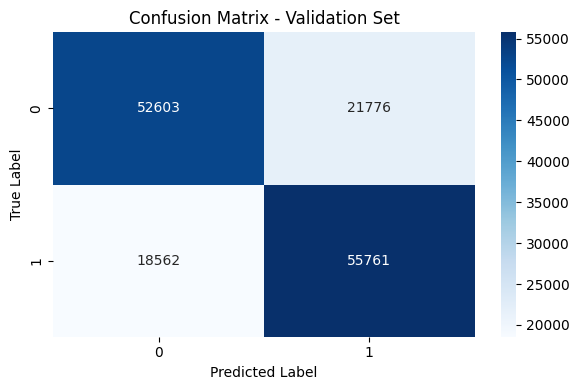

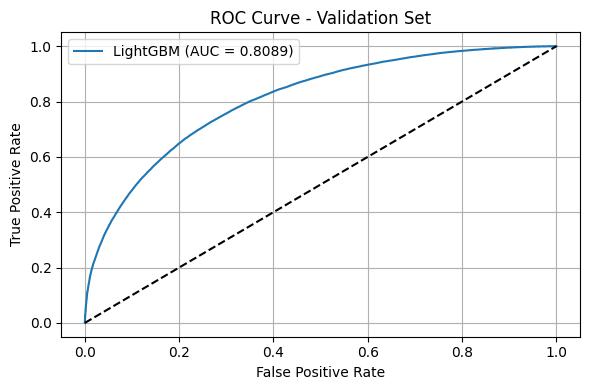

In [25]:
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Evaluation metrics
val_auc = roc_auc_score(y_val, y_val_proba)
val_acc = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
conf_mat = confusion_matrix(y_val, y_val_pred)

# 5. Print results
print("Validation Set Performance (Baseline LightGBM):")
print(f"AUC:        {val_auc:.4f}")
print(f"Accuracy:   {val_acc:.4f}")
print(f"Precision:  {val_precision:.4f}")
print(f"Recall:     {val_recall:.4f}")
print(f"F1 Score:   {val_f1:.4f}")
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# 6. Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# 7. Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"LightGBM (AUC = {val_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Validation Set")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()